In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', **{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)

# Load

In [2]:
expdata = {}
expdata['JLab-E06-014'] = pd.read_table('JLab-E06-014.dat', skiprows = 5, header = 0, delim_whitespace=True, index_col=False)
expdata['JLab-E99-117'] = pd.read_table('JLab-E99-117.dat', skiprows = 5, header = 0, delim_whitespace=True, index_col=False)
expdata['JLab-EG1b'] = pd.read_table('JLab-EG1b.dat', skiprows = 5, header = 0, delim_whitespace=True, index_col=False)
expdata['HERMES2004'] = pd.read_table('HERMES2004.dat', skiprows = 5, header = 0, delim_whitespace=True, index_col=False)
expdata['COMPASS2010'] = pd.read_table('COMPASS2010.dat', skiprows = 5, header = 0, delim_whitespace=True, index_col=False)

expdata['AD'] = pd.read_table('dqoq.dat', skiprows = 5, header = 0, delim_whitespace=True, index_col=False)
expdata['AD JLab-E06-014'] = expdata['AD'][0:6]
expdata['AD JLab-E99-117'] = expdata['AD'][6:9]
expdata['AD HERMES'] = expdata['AD'][9:18]
expdata['AD JLab-EG1b'] = expdata['AD'][18:23]

In [3]:
A1pred1 = pd.read_table('A1_pred1.dat', skiprows = 3, header = 0, delim_whitespace=True, index_col=False)
A1pred2 = pd.read_table('A1_pred2.dat', skiprows = 3, header = 0, delim_whitespace=True, index_col=False)
A1pred3 = pd.read_table('A1_pred3.dat', skiprows = 3, header = 0, delim_whitespace=True, index_col=False)

dqpred1 = pd.read_table('fig3_pred1.dat', skiprows = 3, header = 0, delim_whitespace=True, index_col=False)
dqpred2 = pd.read_table('fig3_pred2.dat', skiprows = 3, header = 0, delim_whitespace=True, index_col=False)
dqpred3 = pd.read_table('fig3_pred3.dat', skiprows = 3, header = 0, delim_whitespace=True, index_col=False)


# Compare plots

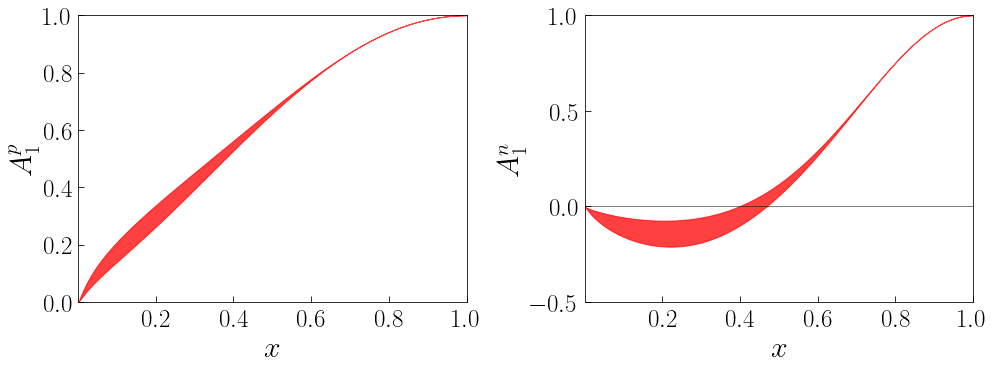

In [5]:
nrows, ncols = 1, 2

fig = plt.figure(figsize = (ncols * 7, nrows * 7 * 0.75))

### A1p
ax = fig.add_subplot(nrows, ncols, 1)

pred = ax.fill_between(A1pred2['x'], A1pred2['A1plower'], A1pred2['A1pupper'], color='red', alpha=0.75, linewidth=1)
ax.axhline(y=0, color='k', linewidth=0.5)

ax.set_xlabel(r'$x$', size=30)
ax.set_ylabel(r'$A_1^p$', size=30)
ax.set_xlim(1e-4, 1)
ax.set_ylim(0, 1)
ax.tick_params(axis='both', which = 'both', direction = 'in', pad=6, length = 6, labelsize = 25)


### A1n
ax = fig.add_subplot(nrows, ncols, 2)

pred = ax.fill_between(A1pred2['x'], A1pred2['A1nlower'], A1pred2['A1nupper'], color='red', alpha=0.75, linewidth=1)
ax.axhline(y=0, color='k', linewidth=0.5)

ax.set_xlabel(r'$x$', size=30)
ax.set_ylabel(r'$A_1^n$', size=30)
ax.set_xlim(1e-4, 1)
ax.set_ylim(-0.5, 1)
ax.tick_params(axis='both', which = 'both', direction = 'in', pad=6, length = 6, labelsize = 25)



fig.tight_layout()
#fig.savefig('dqoverq.pdf')

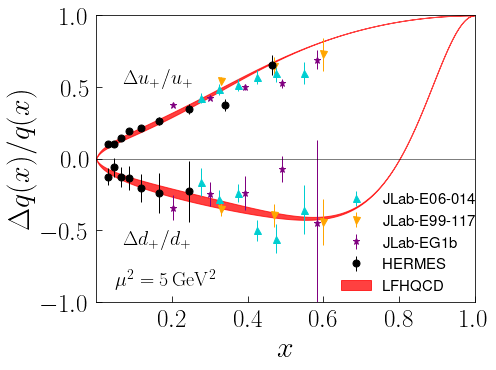

In [9]:
nrows, ncols = 1, 1

fig = plt.figure(figsize = (ncols * 7, nrows * 7 * 0.75))

### dq over q
ax = fig.add_subplot(nrows, ncols, 1)


data1 = ax.errorbar(expdata['AD JLab-E06-014']['x'], expdata['AD JLab-E06-014']['du/u'],\
                    yerr=expdata['AD JLab-E06-014']['Edu/u'],\
                    marker='^', markersize=7, color='darkturquoise', linewidth=1, ls='none')
data1 = ax.errorbar(expdata['AD JLab-E06-014']['x'], expdata['AD JLab-E06-014']['dd/d'],\
                    yerr=expdata['AD JLab-E06-014']['Edd/d'],\
                    marker='^', markersize=7, color='darkturquoise', linewidth=1, ls='none')

data2 = ax.errorbar(expdata['AD JLab-E99-117']['x'], expdata['AD JLab-E99-117']['du/u'],\
                    yerr=expdata['AD JLab-E99-117']['Edu/u'],\
                    marker='v', markersize=7, color='orange', linewidth=1, ls='none')
data2 = ax.errorbar(expdata['AD JLab-E99-117']['x'], expdata['AD JLab-E99-117']['dd/d'],\
                    yerr=expdata['AD JLab-E99-117']['Edd/d'],\
                    marker='v', markersize=7, color='orange', linewidth=1, ls='none')

data3 = ax.errorbar(expdata['AD JLab-EG1b']['x'], expdata['AD JLab-EG1b']['du/u'],\
                    yerr=expdata['AD JLab-EG1b']['Edu/u'],\
                    marker='*', markersize=7, color='purple', linewidth=1, ls='none')
data3 = ax.errorbar(expdata['AD JLab-EG1b']['x'], expdata['AD JLab-EG1b']['dd/d'],\
                    yerr=expdata['AD JLab-EG1b']['Edd/d'],\
                    marker='*', markersize=7, color='purple', linewidth=1, ls='none')

data4 = ax.errorbar(expdata['AD HERMES']['x'], expdata['AD HERMES']['du/u'],\
                    yerr=expdata['AD HERMES']['Edu/u'],\
                    marker='o', markersize=7, color='black', linewidth=1, ls='none')
data4 = ax.errorbar(expdata['AD HERMES']['x'], expdata['AD HERMES']['dd/d'],\
                    yerr=expdata['AD HERMES']['Edd/d'],\
                    marker='o', markersize=7, color='black', linewidth=1, ls='none')

pred = ax.fill_between(dqpred2['x'], dqpred2['u+lower'], dqpred2['u+upper'], color='red', alpha=0.75, linewidth=1)
pred = ax.fill_between(dqpred2['x'], dqpred2['d+lower'], dqpred2['d+upper'], color='red', alpha=0.75, linewidth=1)
ax.axhline(y=0, color='k', linewidth=0.5)

ax.set_xlabel(r'$x$', size=30)
ax.set_ylabel(r'$\Delta q(x)/q(x)$', size=30)
ax.set_xlim(1e-4, 1)
ax.set_ylim(-1, 1)
ax.tick_params(axis='both', which = 'both', direction = 'in', pad=6, length = 6, labelsize = 25)


ax.text(0.05, 0.08, r'$\rm \mu^2=5\,GeV^2$', transform = ax.transAxes, horizontalalignment = 'left', verticalalignment = 'center', size = 20)
ax.text(0.07, 0.78, r'$\Delta u_+/u_+$', transform = ax.transAxes, horizontalalignment = 'left', verticalalignment = 'center', size = 20)
ax.text(0.07, 0.22, r'$\Delta d_+/d_+$', transform = ax.transAxes, horizontalalignment = 'left', verticalalignment = 'center', size = 20)

L = [data1, data2, data3, data4, pred]
H = [r'JLab-E06-014', r'JLab-E99-117', r'JLab-EG1b', r'HERMES', r'LFHQCD']
ax.legend(L, H, frameon = False, loc = (0.63,0.01), fontsize = 15)

fig.tight_layout()
#fig.savefig('dqoverq.pdf')
